In [52]:
from ase.visualize import view
from ase.spacegroup import crystal
from ase import Atoms
from ase.calculators.vasp import Vasp
from ase.calculators.emt import EMT
from ase.constraints import FixAtoms
from ase.optimize import BFGS, QuasiNewton
from ase.lattice.surface import hcp0001
from ase.io import write,read
import matplotlib.pyplot as plt
from ase.visualize.plot import plot_atoms
from ase.lattice.cubic import FaceCenteredCubic
from ase.lattice.surface import fcc111, fcc211, add_adsorbate
import ase.io as io
from ase.build import cut
import surfaces_with_termination as st
import ase

# Creating Pb 2ML slab along 111

<AxesSubplot:>

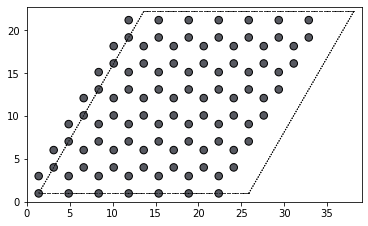

In [111]:
Pb = fcc111('Pb', (7,7,2),vacuum=7.0)
#Pb.rotate(90, 'y', center=(0, 0, 0))
fig, ax = plt.subplots()
plot_atoms(Pb, ax, radii=0.3, rotation=('0x,0y,0z'))
#fig.savefig("ase_slab.png")

# Creating Sb2Te3 unit cell

<AxesSubplot:>

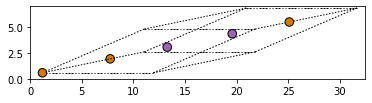

In [54]:
Sb2Te3=ase.io.read("Sb2Te3_mp-1201_primitive.cif")
fig, ax = plt.subplots()
plot_atoms(Sb2Te3, ax, radii=0.3, rotation=('0x,0y,0z'))

# Selecting Te-terminated surface, 3 QL 

In [55]:
termin=st.translate_lattice(Sb2Te3, (1,1,1), tol=0.001)

# Creating 111 cut

<AxesSubplot:>

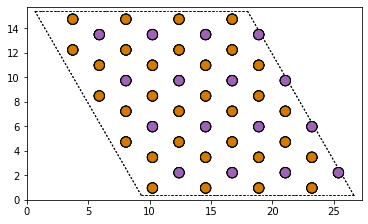

In [61]:
Sb2Te3111 = ase.build.surface(termin[6], (1,1, 1), 3)
fig, ax = plt.subplots()
plot_atoms(Sb2Te3111*(4,4,1), ax, radii=0.3, rotation=('0x,0y,0z'))

# Adding Pb on top 

In [62]:
slab=Sb2Te3111*(4,4,1)
add_adsorbate(slab, Pb, 1.7, offset=1)

In [130]:
write('slab.pov', slab)

# fixing all layers other than top 2

In [17]:
mask = [atom.tag > 2 for atom in slab]
slab.set_constraint(FixAtoms(mask=mask))

In [9]:
ase.build.surfaces_with_termination?

Object `ase.build.surfaces_with_termination` not found.


In [119]:
sub=Sb2Te3111*(12,12,1)

In [123]:
Pb.translate([5,5,0])

In [124]:
interface=sub+Pb

<AxesSubplot:>

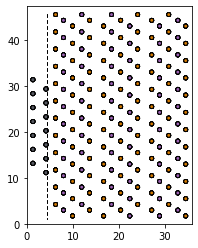

In [129]:
fig, ax = plt.subplots()
plot_atoms(interface, ax, radii=0.3, rotation=('0x,90y,0z'))

In [127]:
interface.get_number_of_atoms

<bound method Atoms.get_number_of_atoms of Atoms(symbols='Pb98Sb864Te1296', pbc=[True, True, False], cell=[[51.994035931723744, 0.0, 0.0], [-25.997017965861858, 45.02815596215367, 0.0], [0.0, 0.0, 0.0]], spacegroup_kinds=..., tags=...)>